In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock_prediction = pd.read_csv('C:\\Users\\Admin\\Desktop\\Projects(FIN)\\Project 1\\Data\\GoogleStockPrediction.csv')
stock_prediction['date'] = pd.to_datetime(stock_prediction['date'])

In [3]:
stock_prediction.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [4]:
stock_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       1258 non-null   object             
 1   date         1258 non-null   datetime64[ns, UTC]
 2   close        1258 non-null   float64            
 3   high         1258 non-null   float64            
 4   low          1258 non-null   float64            
 5   open         1258 non-null   float64            
 6   volume       1258 non-null   int64              
 7   adjClose     1258 non-null   float64            
 8   adjHigh      1258 non-null   float64            
 9   adjLow       1258 non-null   float64            
 10  adjOpen      1258 non-null   float64            
 11  adjVolume    1258 non-null   int64              
 12  divCash      1258 non-null   float64            
 13  splitFactor  1258 non-null   float64            
dtypes: datetime64[ns, UTC](1

In [5]:
stock_prediction.corr()[['close','open']]

,close,open
close,1.000000,0.999083
high,0.999528,0.999575
low,0.999586,0.999499
open,0.999083,1.000000
volume,-0.025574,-0.021381
adjClose,1.000000,0.999083
adjHigh,0.999528,0.999575
adjLow,0.999586,0.999499
adjOpen,0.999083,1.000000
adjVolume,-0.025574,-0.021381


In [109]:
stock_prediction[stock_prediction['close']!=stock_prediction['adjClose']]

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor


In [110]:
stock_prediction[stock_prediction['open']!=stock_prediction['adjOpen']]

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor


In [111]:
stock_prediction[stock_prediction['low']!=stock_prediction['adjLow']]

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1024,GOOG,2020-07-09 00:00:00+00:00,1510.99,1522.72,1488.08,1506.45,1423300,1510.99,1522.720,1488.085,1506.45,1423300,0.0,1.0
1026,GOOG,2020-07-13 00:00:00+00:00,1511.34,1577.13,1505.24,1550.00,1846400,1511.34,1577.132,1505.243,1550.00,1846400,0.0,1.0


In [112]:
stock_prediction[stock_prediction['high']!=stock_prediction['adjHigh']]

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1026,GOOG,2020-07-13 00:00:00+00:00,1511.34,1577.13,1505.24,1550.0,1846400,1511.34,1577.132,1505.243,1550.0,1846400,0.0,1.0


In [113]:
stock_prediction[stock_prediction['volume']!=stock_prediction['adjVolume']]

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor


In [114]:
stock_prediction['splitFactor'].unique()

array([1.])

In [115]:
stock_prediction['divCash'].unique()

array([0.])

In [116]:
stock_prediction['symbol'].unique()

array(['GOOG'], dtype=object)

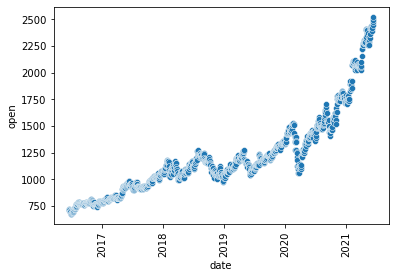

In [117]:
sns.scatterplot(data = stock_prediction,x ='date', y = 'open')
plt.xticks(rotation = 90);

In [118]:
stock_prediction.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [119]:
X = stock_prediction.drop(['symbol','date','close','open','divCash', 'splitFactor'],axis = 1)
y = stock_prediction[['close','open']]

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import time

In [125]:
def train_test_model(model,X_train,y_train,X_val,y_val):
    tic = time.time()
    model.fit(X_train,y_train)
    toc = time.time()
    
    predictions = model.predict(X_val)
    
    time_taken = toc-tic
    MAEclose = mean_absolute_error(y_val['close'],predictions[:,0])
    MAEpclose = MAEclose/stock_prediction['close'].mean() * 100
    MAEopen = mean_absolute_error(y_val['open'],predictions[:,1])
    MAEpopen = MAEopen/stock_prediction['open'].mean() * 100
    
    RMSEclose = np.sqrt(mean_squared_error(y_val['close'],predictions[:,0]))
    RMSEpclose = RMSEclose/stock_prediction['close'].std() * 100
    RMSEopen = np.sqrt(mean_squared_error(y_val['open'],predictions[:,1]))
    RMSEpopen = RMSEopen/stock_prediction['open'].std() * 100
    
    R2close = r2_score(y_val['close'],predictions[:,0])
    R2open = r2_score(y_val['open'],predictions[:,1])
    
    print('Time taken: ',time_taken)
    print('Close:\n')
    print('Mean absolute error: ',MAEclose)
    print("Mean absolute error percent: ",MAEpclose)
    print("Root mean squared error: ",RMSEclose)
    print("Root mean squared error percent: ",RMSEpclose)
    print("R2 score: ",R2close)
    residue1 = y_val['close']-predictions[:,0]
    sns.scatterplot(x = y_val['close'],y = residue1,alpha=0.3)
    plt.hlines(0,0,y_val['close'].max(),'red','--')
    plt.show()
    
    print('Open:\n')
    print('Mean absolute error: ',MAEopen)
    print("Mean absolute error percent: ",MAEpopen)
    print("Root mean squared error: ",RMSEopen)
    print("Root mean squared error percent: ",RMSEpopen)
    print("R2 score: ",R2open)
    residue2 = y_val['open']-predictions[:,0]
    sns.scatterplot(x = y_val['open'],y = residue2)
    plt.hlines(0,0,y_val['open'].max(),'red','--')
    plt.show()
#     return time_taken,MAE,MAEp,RMSE,RMSEp,R2
#     return time_taken,MAE,RMSE,R2

In [126]:
from sklearn.linear_model import LinearRegression

With adj values:

Time taken:  0.003989219665527344
Close:

Mean absolute error:  3.5188783104309725e-14
Mean absolute error percent:  2.8930600470548995e-15
Root mean squared error:  9.001988619012845e-14
Root mean squared error percent:  2.3483447076954504e-14
R2 score:  1.0


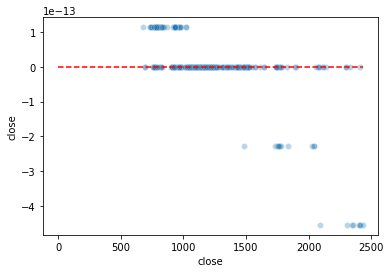

Open:

Mean absolute error:  2.336896108722107e-13
Mean absolute error percent:  1.9229585530408782e-14
Root mean squared error:  2.8304170443399e-13
Root mean squared error percent:  7.400808686115348e-14
R2 score:  1.0


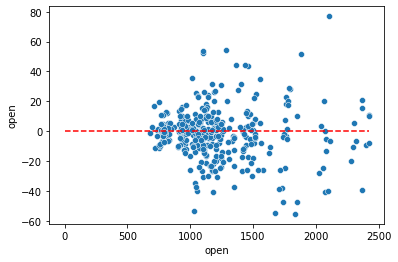

In [127]:
linear_model = LinearRegression()
print("With adj values:\n")
train_test_model(linear_model,scaled_X_train,y_train,scaled_X_test,y_test)
# linear_model.fit(scaled_X_train,y_train)

In [128]:
stock_prediction.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [129]:
X1 = stock_prediction.drop(['symbol','date','close','open','divCash', 'splitFactor','adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume'],axis = 1)
y1 = stock_prediction[['close','open']]

In [130]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [131]:
scaler1 = StandardScaler()
scaled_X_train1 = scaler1.fit_transform(X_train1)
scaled_X_test1 = scaler1.transform(X_test1)

Without adj values:

Time taken:  0.001994609832763672
Close:

Mean absolute error:  6.755162058838361
Mean absolute error percent:  0.5553783831022236
Root mean squared error:  9.879435179871503
Root mean squared error percent:  2.577243795962012
R2 score:  0.9992644495191928


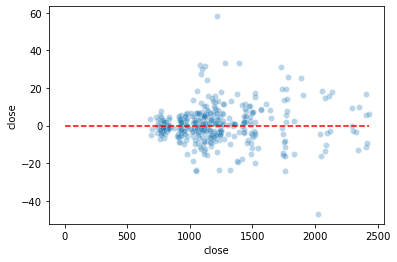

Open:

Mean absolute error:  6.536406459806602
Mean absolute error percent:  0.5378603978638158
Root mean squared error:  9.168382221553754
Root mean squared error percent:  2.3972948763359745
R2 score:  0.9993613280813645


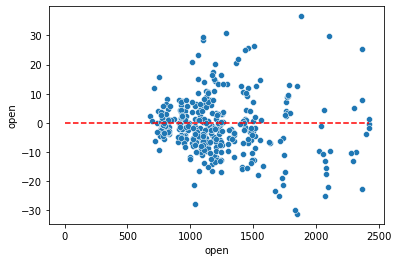

In [132]:
linear_model_2 = LinearRegression()
print("Without adj values:\n")
train_test_model(linear_model,scaled_X_train1,y_train1,scaled_X_test1,y_test1)

In [133]:
X1

,high,low,volume
0,722.470,713.1200,1306065
1,722.980,717.3100,1214517
2,716.650,703.2600,1982471
3,708.820,688.4515,3402357
4,702.480,693.4100,2082538
...,...,...,...
1253,2468.000,2441.0725,1192453
1254,2494.495,2468.2400,1253253
1255,2505.000,2487.3300,1006337
1256,2523.260,2494.0000,1561733
